In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram
import qiskit.quantum_info as qi
import numpy as np
from matplotlib import pyplot as plt
from qiskit.visualization import plot_bloch_multivector, plot_bloch_vector
from scipy.linalg import sqrtm
from qtm import *
import constant 


Step 0: 0.11719999999999997
     ┌───────────────┐┌───────────────┐┌──────────────┐┌────────────────┐┌─┐
q_0: ┤ U3(π/4,π/3,0) ├┤ RZ(0.0020106) ├┤ RX(0.092834) ├┤ RZ(0.00034558) ├┤M├
     └───────────────┘└───────────────┘└──────────────┘└────────────────┘└╥┘
c: 1/═════════════════════════════════════════════════════════════════════╩═
                                                                          0 
Step 30: 0.0011999999999999789
     ┌───────────────┐┌─────────────┐┌─────────────┐┌────────────────┐┌─┐
q_0: ┤ U3(π/4,π/3,0) ├┤ RZ(0.43722) ├┤ RX(0.77239) ├┤ RZ(-0.0040841) ├┤M├
     └───────────────┘└─────────────┘└─────────────┘└────────────────┘└╥┘
c: 1/══════════════════════════════════════════════════════════════════╩═
                                                                       0 
Step 60: 0.0
     ┌───────────────┐┌─────────────┐┌─────────────┐┌────────────────┐┌─┐
q_0: ┤ U3(π/4,π/3,0) ├┤ RZ(0.51554) ├┤ RX(0.78288) ├┤ RZ(-0.0038327) ├┤M├
     └───────────────┘└──

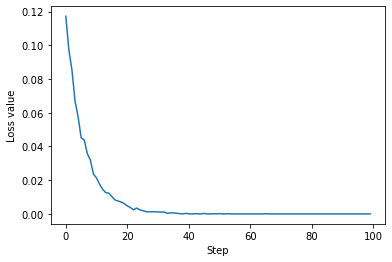

In [3]:
# Theta, phi, lambdaz is the params of u3 gate
# theta = np.random.uniform(0, np.pi)
# phi = np.random.uniform(0, 2*np.pi)

theta = np.pi / 4
phi = np.pi / 3
lambdaz = 0
thetas = np.zeros((3,))

ls = []

qc = QuantumCircuit(1, 1)
qc = u_3(qc, theta, phi, lambdaz, 0)
for i in range(0, 100):
    thetas = thetas - constant.learning_rate*grad_l(qc, thetas, np.pi/2, 1/2, measurement_basis='z')
    qc = u_thetas(qc, thetas, 0)
    loss = 1 - measure(qc, 0, 0)
    if i % 30 == 0:
        print('Step ' + str(i) + ': ' + str(loss) )
        print(qc.draw())
    
    
    ls.append(loss)
    qc.data.pop()
    qc.data.pop()
    qc.data.pop()
    qc.data.pop()
    

psi = qi.Statevector.from_instruction(qc)
psi_hat = qi.Statevector(get_psi_hat(thetas))
rho_psi = qi.DensityMatrix(psi)
rho_psi_hat = qi.DensityMatrix(psi_hat)

print(psi)
print(psi_hat)

plt.show()
plt.plot(ls)
plt.xlabel("Step")
plt.ylabel("Loss value")
plt.show()
    

In [4]:
psi1 = np.expand_dims(psi.data, axis=0).transpose()
psi_hat1 = np.expand_dims(psi_hat.data, axis=0).transpose()

print(psi1)
print(psi_hat1)
print(trace_distance(rho_psi, rho_psi_hat))
print(trace_fidelity(rho_psi, rho_psi_hat))
print(np.linalg.norm(inner_product(psi1, psi_hat1))**2)


[[0.92387953+0.j        ]
 [0.19134172+0.33141357j]]
[[0.89319642+0.23745755j]
 [0.09951126+0.36866187j]]
0.0008962778990404539
(0.9999995983428818+3.920475055707584e-15j)
0.9999991966859275


In [5]:
from kaleidoscope import bloch_sphere

bloch_sphere([psi, psi_hat])
